# E-Commerce Shipping Data

### Data Description

- ID: ID Number of Customers.
- Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment: The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
- Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product: Cost of the Product in US Dollars.
- Prior purchases: The Number of Prior Purchase.
- Product importance: The company has categorized the product in the various parameter such as low, medium, high.
- Gender: Male and Female.
- Discount offered: Discount offered on that specific product.
- Weight in gms: It is the weight in grams.
- Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# Import Libraries

In [455]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

# Understanding the Data Structure

In [456]:
# Load the dataset
df = pd.read_csv('data/Train.csv')

# Display the first few rows
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [457]:
df.shape

(10999, 12)

In [458]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [460]:
# Check for missing values
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [461]:
# check for duplicates
df.duplicated().sum()

0

# Cleaning the Data

In [462]:
# dropping unnecessary columns
df.drop(['ID'], axis=1, inplace=True)

In [463]:
# making column names lowercase
df.columns = df.columns.str.lower()

In [464]:
# changing reached.on.time_y.n to reached_on_time
df.rename(columns={'reached.on.time_y.n':'reached_on_time'}, inplace=True)

In [465]:
# Combine rare categories for categorical variables
# def combine_rare_categories(series, threshold=10):
#     counts = series.value_counts()
#     rare_categories = counts[counts < threshold].index
#     return series.apply(lambda x: 'Other' if x in rare_categories else x)

In [466]:
# df['warehouse_block'] = combine_rare_categories(df['warehouse_block'])
# df['mode_of_shipment'] = combine_rare_categories(df['mode_of_shipment'])
# df['product_importance'] = combine_rare_categories(df['product_importance'])
# df['gender'] = combine_rare_categories(df['gender'])

In [467]:
numerical_cols = ['customer_care_calls', 'customer_rating', 'cost_of_the_product', 
                      'prior_purchases', 'discount_offered', 'weight_in_gms']

categorical_cols = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender', ]

## Correlation Analysis

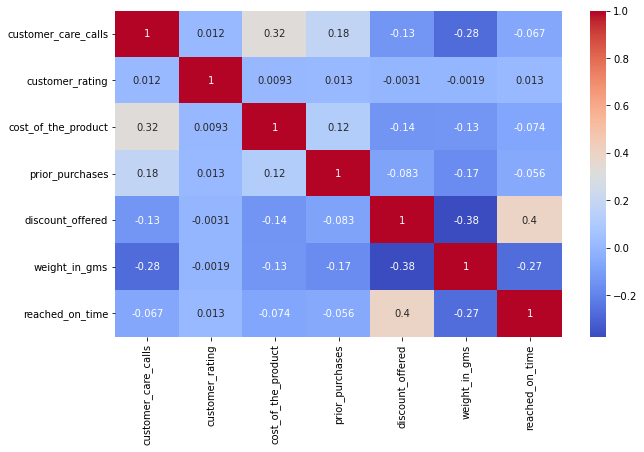

In [468]:
# correlation matrix heatmap for numerical columns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Outlier Detection

In [469]:
# function to find outliers
def find_outliers_iqr(dataframe, column):
    """
    Find the outliers in the column using the IQR method
    -
    Input: 
        dataframe: Pandas DataFrame
        column: str
    -
    Output:
        Prints:
            - The number of outliers in the column.
            - The percentage of outliers in the column.
    """
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    percent_outliers = len(outliers) * 100 / len(dataframe)
    
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {percent_outliers:.2f}%")

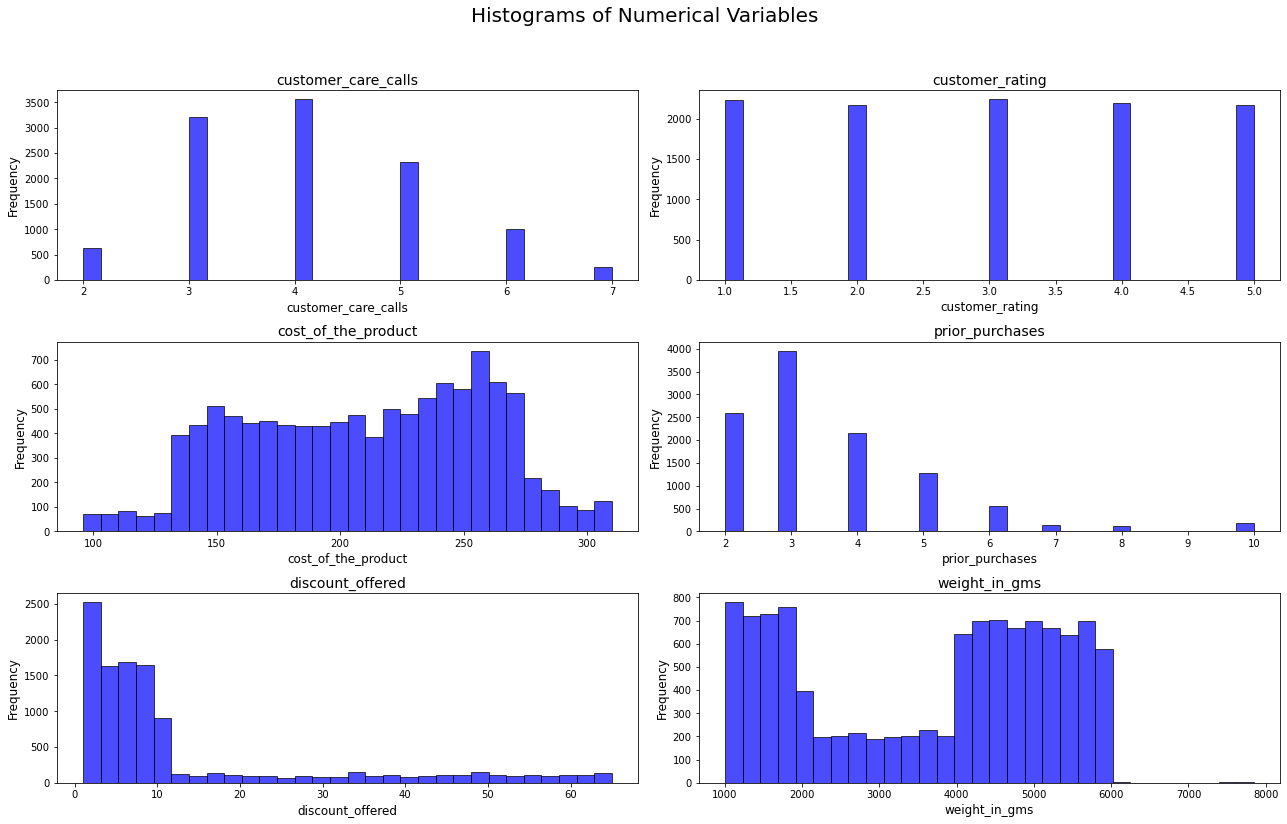

In [470]:
# Plot histograms for each numerical variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.suptitle('Histograms of Numerical Variables', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    if i < len(numerical_cols):
        ax.hist(df[numerical_cols[i]], bins=30, color='blue', edgecolor='black', alpha=0.7)
        ax.set_title(numerical_cols[i], fontsize=14)
        ax.set_xlabel(numerical_cols[i], fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [471]:
# check for outliers in all numerical columns
for col in numerical_cols:
    print(f"Outliers in {col}")
    find_outliers_iqr(df, col)
    print("\n")

Outliers in customer_care_calls
Number of outliers: 0
Percentage of outliers: 0.00%


Outliers in customer_rating
Number of outliers: 0
Percentage of outliers: 0.00%


Outliers in cost_of_the_product
Number of outliers: 0
Percentage of outliers: 0.00%


Outliers in prior_purchases
Number of outliers: 1003
Percentage of outliers: 9.12%


Outliers in discount_offered
Number of outliers: 2209
Percentage of outliers: 20.08%


Outliers in weight_in_gms
Number of outliers: 0
Percentage of outliers: 0.00%




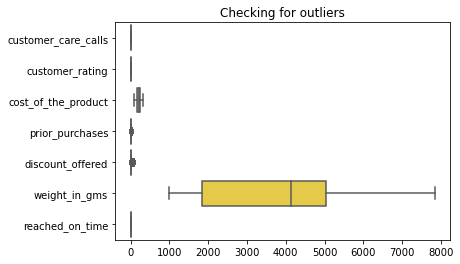

In [472]:
# check for outliers
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Checking for outliers')
plt.show()

# Data Visualization

<function seaborn.categorical.countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, ax=None, **kwargs)>

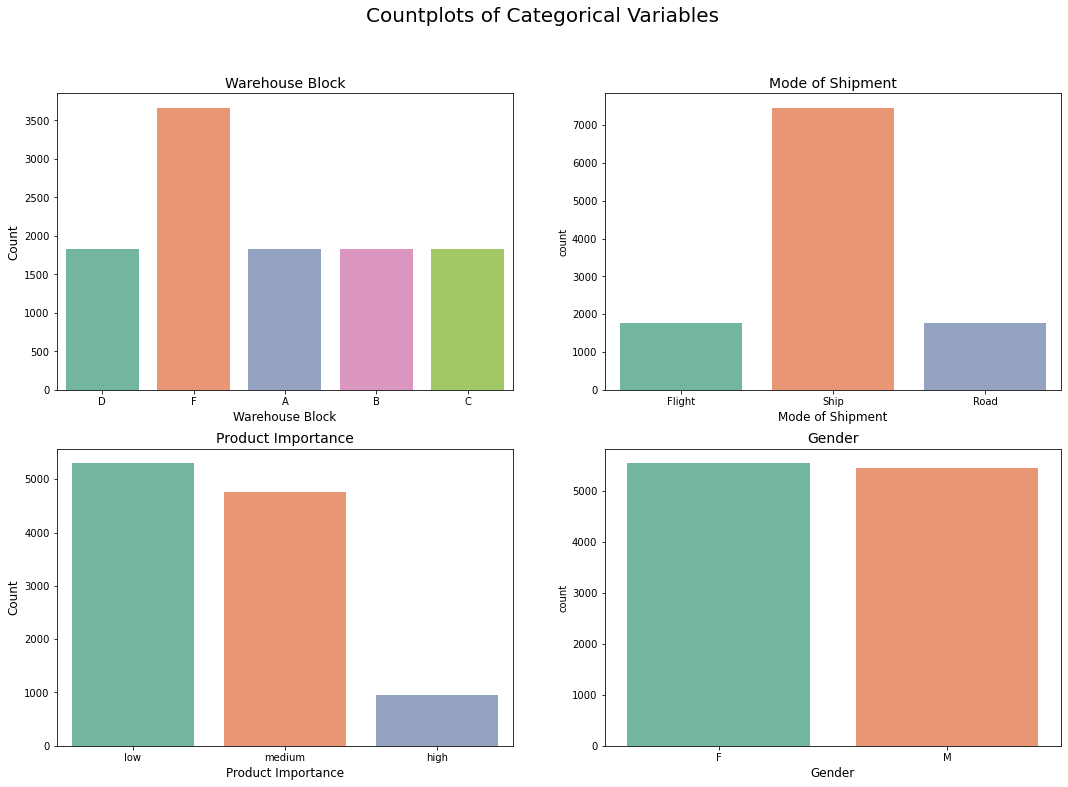

In [473]:
# countplot for categorical columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Countplots of Categorical Variables', fontsize=20)

sns.countplot(x='warehouse_block', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Warehouse Block', fontsize=14)
axes[0, 0].set_xlabel('Warehouse Block', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)

sns.countplot(x='mode_of_shipment', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Mode of Shipment', fontsize=14)
axes[0, 1].set_xlabel('Mode of Shipment', fontsize=12)

sns.countplot(x='product_importance', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Product Importance', fontsize=14)
axes[1, 0].set_xlabel('Product Importance', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)

sns.countplot(x='gender', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Gender', fontsize=14)
axes[1, 1].set_xlabel("Gender", fontsize=12)

sns.countplot

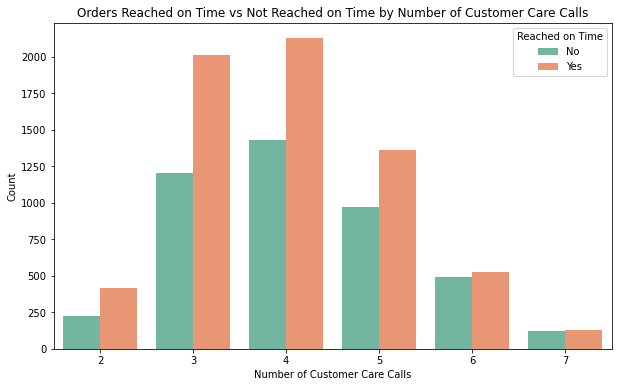

In [474]:
# orders reached on time vs not reached on time by number of customer care calls
plt.figure(figsize=(10,6))
sns.countplot(x='customer_care_calls', hue='reached_on_time', data=df, palette='Set2')
plt.title('Orders Reached on Time vs Not Reached on Time by Number of Customer Care Calls')
plt.xlabel('Number of Customer Care Calls')
plt.ylabel('Count')
plt.legend(title='Reached on Time', labels=['No', 'Yes'])
plt.show()

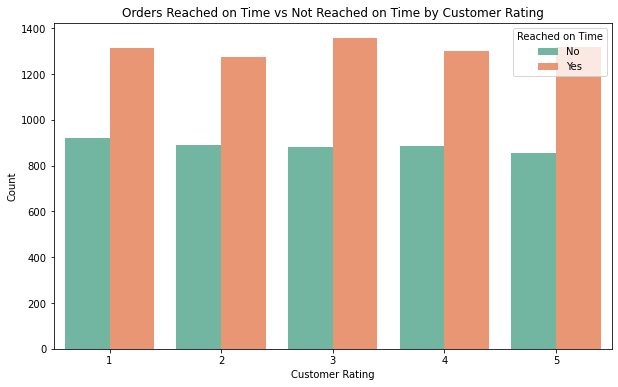

In [475]:
# orders reached on time vs not reached on time by customer rating
plt.figure(figsize=(10,6))
sns.countplot(x='customer_rating', hue='reached_on_time', data=df, palette='Set2')
plt.title('Orders Reached on Time vs Not Reached on Time by Customer Rating')
plt.xlabel('Customer Rating')
plt.ylabel('Count')
plt.legend(title='Reached on Time', labels=['No', 'Yes'])
plt.show()

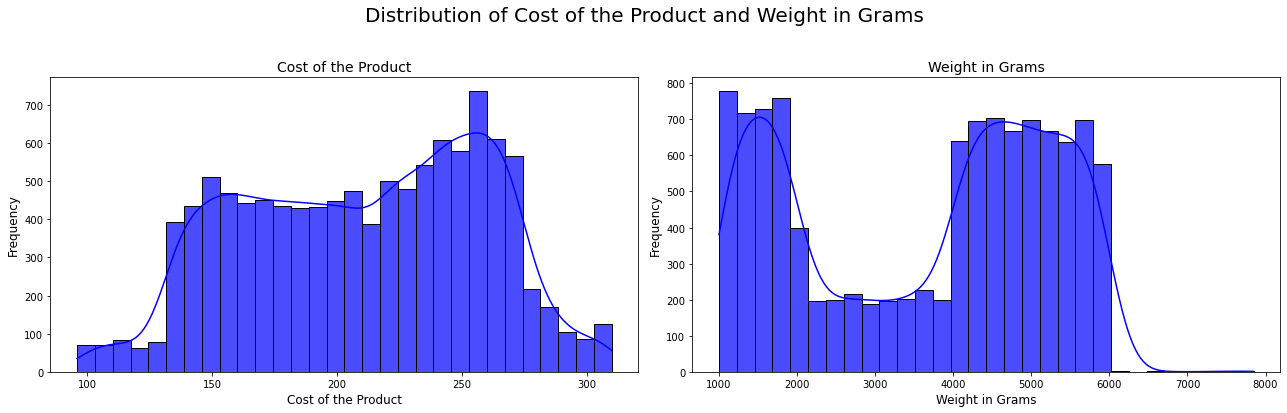

In [476]:
# displot cost of product and weight in gms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Distribution of Cost of the Product and Weight in Grams', fontsize=20)

sns.histplot(df['cost_of_the_product'], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].set_title('Cost of the Product', fontsize=14)
axes[0].set_xlabel('Cost of the Product', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(df['weight_in_gms'], bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7, ax=axes[1])
axes[1].set_title('Weight in Grams', fontsize=14)
axes[1].set_xlabel('Weight in Grams', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

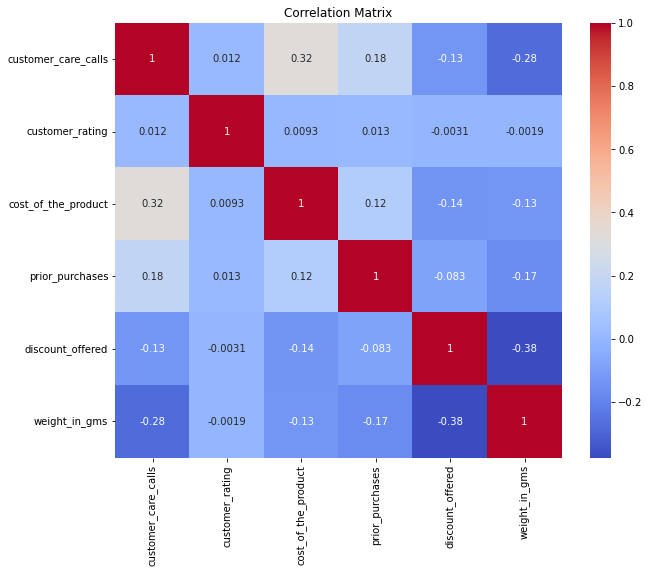

               feature        VIF
0  customer_care_calls  13.609929
1      customer_rating   5.104470
2  cost_of_the_product  17.188252
3      prior_purchases   6.299497
4     discount_offered   1.645354
5        weight_in_gms   4.746106


In [477]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Calculate VIF
X_vif = df[numerical_cols]
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)


1    6563
0    4436
Name: reached_on_time, dtype: int64


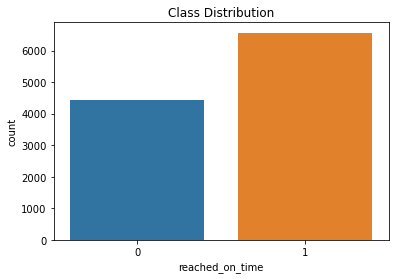

In [478]:
# Check the distribution of the target variable
print(df['reached_on_time'].value_counts())
sns.countplot(x=df['reached_on_time'])
plt.title('Class Distribution')
plt.show()

## Splitting Data into Training and Testing Sets

In [479]:
# Define features and target variable
X = df.drop(columns='reached_on_time', axis=1)
y = df['reached_on_time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [480]:
# preprocess numerical data
numerical_transformer = StandardScaler()

# preprocess categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [481]:
# # Fit the preprocessor on the training data
# preprocessor.fit(X_train)

# # Transform the training and test data
# X_train_encoded = preprocessor.transform(X_train)
# X_test_encoded = preprocessor.transform(X_test)

# # Convert the transformed data to DataFrame for inspection
# # Get feature names for the one-hot encoded columns
# cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
# all_feature_names = numerical_cols + list(cat_feature_names)

# # Create DataFrames for inspection
# X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=all_feature_names)
# X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=all_feature_names)

In [482]:
# X_train_encoded_df.head()

In [483]:
# X_test_encoded_df.head()

### Baseline Logistic Regression

In [484]:
# Create the logistic regression pipeline
baseline_logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=100))
])

# Train the model
baseline_logistic_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'product_importance',
                                                   'gender'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [485]:
# Make predictions
y_pred_baseline = baseline_logistic_model.predict(X_test)
y_prob_baseline = baseline_logistic_model.predict_proba(X_test)[:, 1]

In [486]:
# Calculate roc_auc metric
baseline_roc_auc = roc_auc_score(y_test, y_pred_baseline)

# Classification report
print('Baseline Logistic Regression Model Metrics:')
print(classification_report(y_test, y_pred_baseline))

Baseline Logistic Regression Model Metrics:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



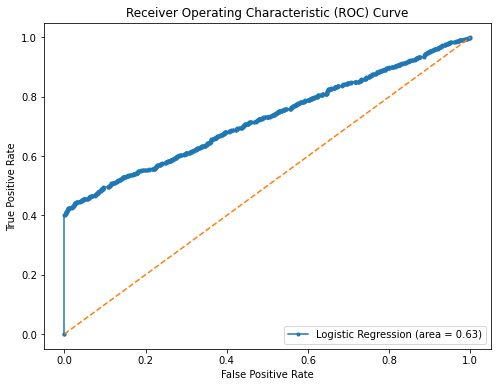

In [487]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_baseline)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='Logistic Regression (area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

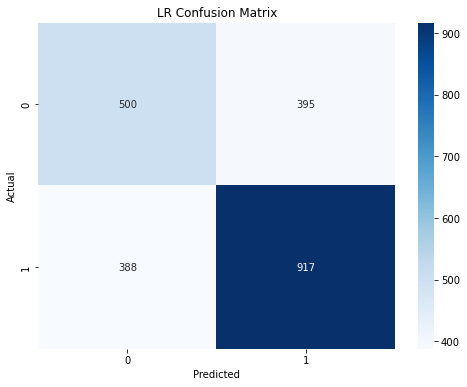

In [488]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_baseline)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LR Confusion Matrix')
plt.show()

### Logistic Regression Hyperparameter Tuning

In [489]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100], # Regularization parameter
    'classifier__penalty': ['l1', 'l2'], # Regularization type
    'classifier__solver': ['lbfgs', 'liblinear'], # Optimization algorithm
    'classifier__class_weight': [None, 'balanced'], # Weights associated with classes
    'classifier__max_iter': [100, 200, 500, 1000], # Maximum number of iterations
    'classifier__tol': [1e-4, 1e-3, 1e-2] # Tolerance for stopping criteria
}

In [490]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(baseline_logistic_model, param_grid, cv=10, scoring='recall')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['customer_care_calls',
                                                                          'customer_rating',
                                                                          'cost_of_the_product',
                                                                          'prior_purchases',
                                                                          'discount_offered',
                                                                          'weight_in_gms']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['warehouse_block',
                                                                          'mode_of_shipment',
                                                                          'product_importance',
                                                                          'gender'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__class_weight': [None, 'balanced'],
                         'classifier__max_iter': [100, 200, 500, 1000],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['lbfgs', 'liblinear'],
                         'classifier__tol': [0.0001, 0.001, 0.01]},
             scoring='recall')

In [491]:
# Best model after tuning
best_model = grid_search.best_estimator_
print(f'Best Model: {best_model}')

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

roc_auc_best = roc_auc_score(y_test, y_prob_best)

# Classification report
print('Tuned Model Metrics:')
print(classification_report(y_test, y_pred_best))

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'product_importance',
            

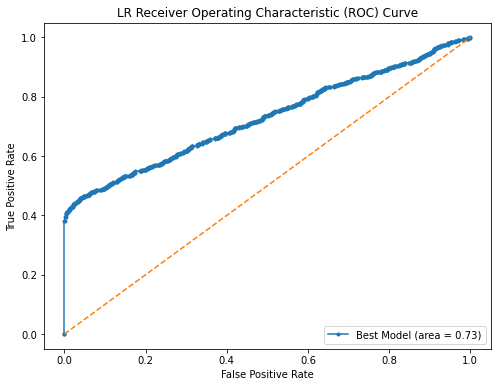

In [492]:
# Plot ROC curve for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, marker='.', label='Best Model (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

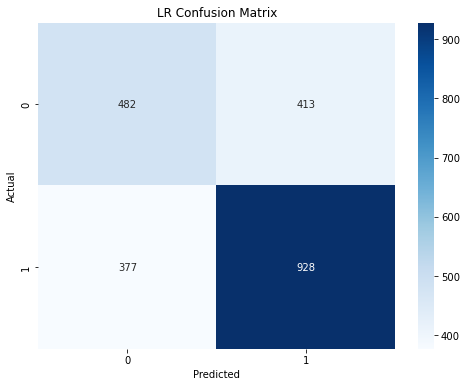

In [493]:
# Display confusion matrix for the best model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LR Confusion Matrix')
plt.show()

### Decision Tree

In [494]:
# Create the decision tree pipeline
baseline_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

baseline_tree_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'product_importance',
                                                   'gender'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [495]:
y_pred_tree_baseline = baseline_tree_model.predict(X_test)
y_prob_tree_baseline = baseline_tree_model.predict_proba(X_test)[:, 1]

In [496]:
roc_auc_best_tree = roc_auc_score(y_test, y_prob_tree_baseline)

# Classification report
print('Baseline Decision Tree Model Metrics:')
print(classification_report(y_test, y_pred_tree_baseline))

Baseline Decision Tree Model Metrics:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       895
           1       0.70      0.69      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



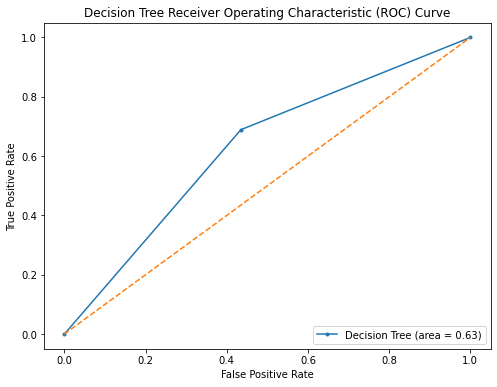

In [497]:
# Plot ROC curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree_baseline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, marker='.', label='Decision Tree (area = %0.2f)' % roc_auc_best_tree)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

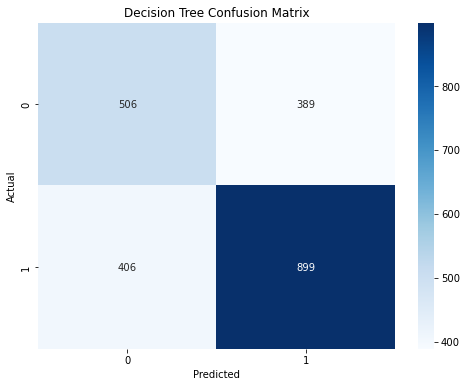

In [498]:
# Display confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree_baseline)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

### Decision Tree Hyperparameter Tuning

In [524]:
# Hyperparameter tuning grid for Decision Tree
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10, 20, 50],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random']
}

In [525]:
# Perform grid search with cross-validation
grid_search_tree = GridSearchCV(baseline_tree_model, param_grid, cv=10, scoring='recall')
grid_search_tree.fit(X_train, y_train)

# Best model after tuning
best_tree_model = grid_search_tree.best_estimator_
print(f'Best Model: {best_tree_model}')

# Make predictions with the best model
y_pred_best_tree = best_tree_model.predict(X_test)
y_prob_best_tree = best_tree_model.predict_proba(X_test)[:, 1]

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['customer_care_calls',
                                                   'customer_rating',
                                                   'cost_of_the_product',
                                                   'prior_purchases',
                                                   'discount_offered',
                                                   'weight_in_gms']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['warehouse_block',
                                                   'mode_of_shipment',
                                                   'product_importance',
            

In [526]:
roc_auc_best_tree = roc_auc_score(y_test, y_prob_best_tree)

# Classification report
print('Tuned Decision Tree Model Metrics:')
print(classification_report(y_test, y_pred_best_tree))

Tuned Decision Tree Model Metrics:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       895
           1       0.71      0.71      0.71      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



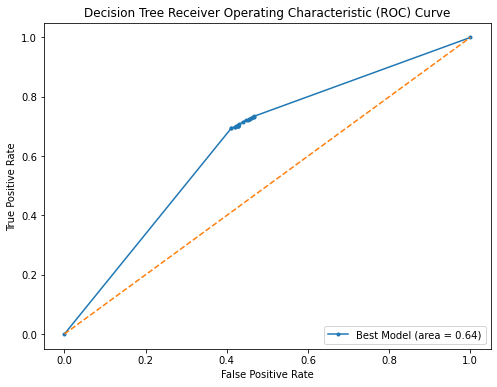

In [527]:
# Plot ROC curve for the best model
fpr_best_tree, tpr_best_tree, _ = roc_curve(y_test, y_prob_best_tree)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_tree, tpr_best_tree, marker='.', label='Best Model (area = %0.2f)' % roc_auc_best_tree)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

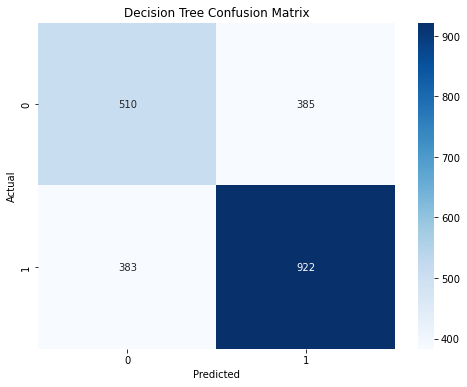

In [528]:
# Display confusion matrix for the best model
conf_matrix_best_tree = confusion_matrix(y_test, y_pred_best_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [529]:
# Extract feature importances
classifier = best_tree_model.named_steps['classifier']
feature_importances = classifier.feature_importances_

In [530]:
# Combine feature names
feature_names = numerical_cols + list(best_tree_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

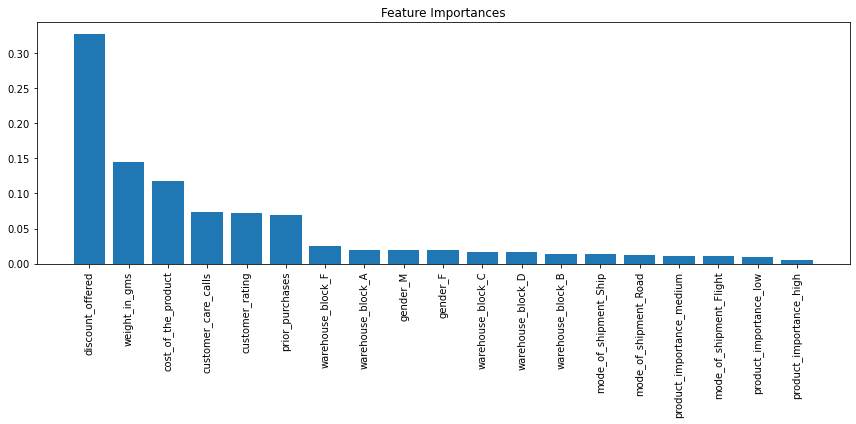

In [531]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [532]:
# Select top N features
N = 10
top_indices = indices[:N]
top_features = [feature_names[i] for i in top_indices]
print(f"Top {N} features: {top_features}")

Top 10 features: ['discount_offered', 'weight_in_gms', 'cost_of_the_product', 'customer_care_calls', 'customer_rating', 'prior_purchases', 'warehouse_block_F', 'warehouse_block_A', 'gender_M', 'gender_F']


In [537]:
# Create a new ColumnTransformer for selected features
top_numeric_features = [f for f in top_features if f in numerical_cols]
top_categorical_features = [f for f in top_features if f in categorical_cols]

new_preprocessor_decision_tree = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), top_numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), top_categorical_features)
    ]
)

# Define the new pipeline with selected features
new_pipeline_decision_tree = Pipeline(steps=[
    ('preprocessor', new_preprocessor_decision_tree),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [541]:
# Perform grid search with cross-validation on the new pipeline
new_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10, 20, 50],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random']
}

In [543]:
new_grid_search_tree = GridSearchCV(new_pipeline_decision_tree, new_param_grid, cv=10, scoring='recall')
new_grid_search_tree.fit(X_train, y_train)

# Best model after tuning with selected features
best_new_tree_model = new_grid_search_tree.best_estimator_
print(f'Best Model with Selected Features: {best_new_tree_model}')

# Make predictions with the best model
y_pred_best_new_tree = best_new_tree_model.predict(X_test)
y_prob_best_new_tree = best_new_tree_model.predict_proba(X_test)[:, 1]

Best Model with Selected Features: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['discount_offered',
                                                   'weight_in_gms',
                                                   'cost_of_the_product',
                                                   'customer_care_calls',
                                                   'customer_rating',
                                                   'prior_purchases']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42,
                                        spli

In [544]:
roc_auc_best_new_tree = roc_auc_score(y_test, y_prob_best_new_tree)

# Classification report
print('Tuned Decision Tree Model Metrics with Selected Features:')
print(classification_report(y_test, y_pred_best_new_tree))

Tuned Decision Tree Model Metrics with Selected Features:
              precision    recall  f1-score   support

           0       0.59      0.46      0.51       895
           1       0.68      0.78      0.72      1305

    accuracy                           0.65      2200
   macro avg       0.63      0.62      0.62      2200
weighted avg       0.64      0.65      0.64      2200

